In [ ]:
import pandas as pd
import numpy as np

Загрузите датасет Olivetti faces;

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

Выведите информацию о количественных параметрах датасета;

In [ ]:
X = faces.data
X.shape

(400, 4096)

In [ ]:
Y = faces.target
Y.shape

(400,)

Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib

In [ ]:
import matplotlib.pyplot as plt

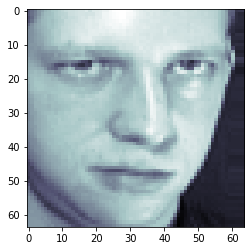

In [ ]:
plt.imshow(faces.images[10], cmap=plt.cm.bone)

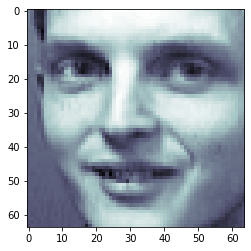

In [ ]:
plt.imshow(faces.images[399], cmap=plt.cm.bone)

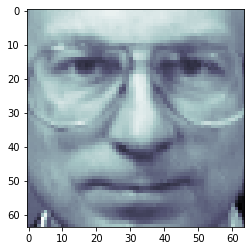

In [ ]:
plt.imshow(faces.images[121], cmap=plt.cm.bone)

Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

Постройте модель классификатора метода опорных векторов для идентификации человека по изображению

In [ ]:
#Support Vector Machines — SVM
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# get number of support vectors for each class
model.n_support_

array([ 7,  7,  9, 10,  9,  7,  7,  8,  7,  8,  7,  8,  8,  8, 10, 10,  9,
        7,  8,  9,  7,  7,  4,  9,  8,  9,  9,  6,  8,  8,  9,  7,  7,  9,
        8,  8,  7,  8,  6,  8], dtype=int32)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Text(0.5, 159.0, 'Предсказанные значения')

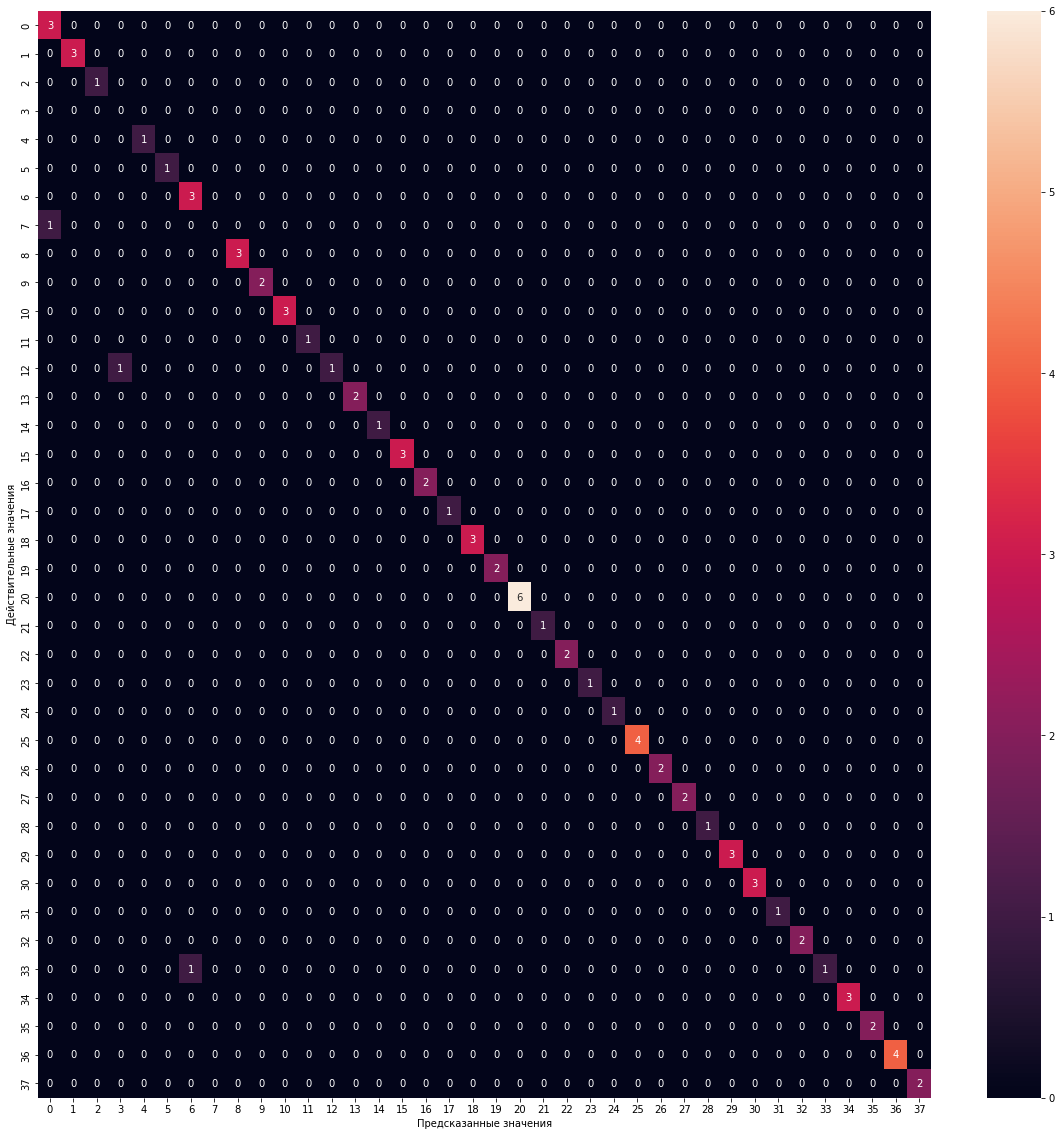

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(20,20))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Оцените качество модели на тестовой выборке с помощью следующих метрик

In [ ]:
dt_accur = []
accur = metrics.accuracy_score(y_test, y_pred) #Метрика достоверности предсказания
dt_accur.append(accur)
dt_accur

[0.9625]

In [ ]:
dt_precis = []
precision = metrics.precision_score(y_test, y_pred, average='macro')
dt_precis.append(precision)
dt_precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9342105263157895]

In [ ]:
collect_data = []
dt = metrics.recall_score(y_test, y_pred, average='macro')
collect_data.append(dt)
collect_data

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9210526315789473]

Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

Сделайте вывод о применимости модели.

ДОПОЛНИТЕЛЬНЫЕ ЗАДАНИЯ

Постройте модели классификации на основе следующих методов:
логистическая регрессия (LogisticRegression);
метод опорных векторов с гауссовым ядром (SVC);
метод опорных векторов с полиномиальным ядром (SVC);
метод k ближайших соседей (KNeighborsClassifier);
многослойный перцептрон (MLP);
другие методы по желанию;

In [ ]:
# логистическая регрессия (LogisticRegression)
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred2 = cls.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred2)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Text(0.5, 159.0, 'Предсказанные значения')

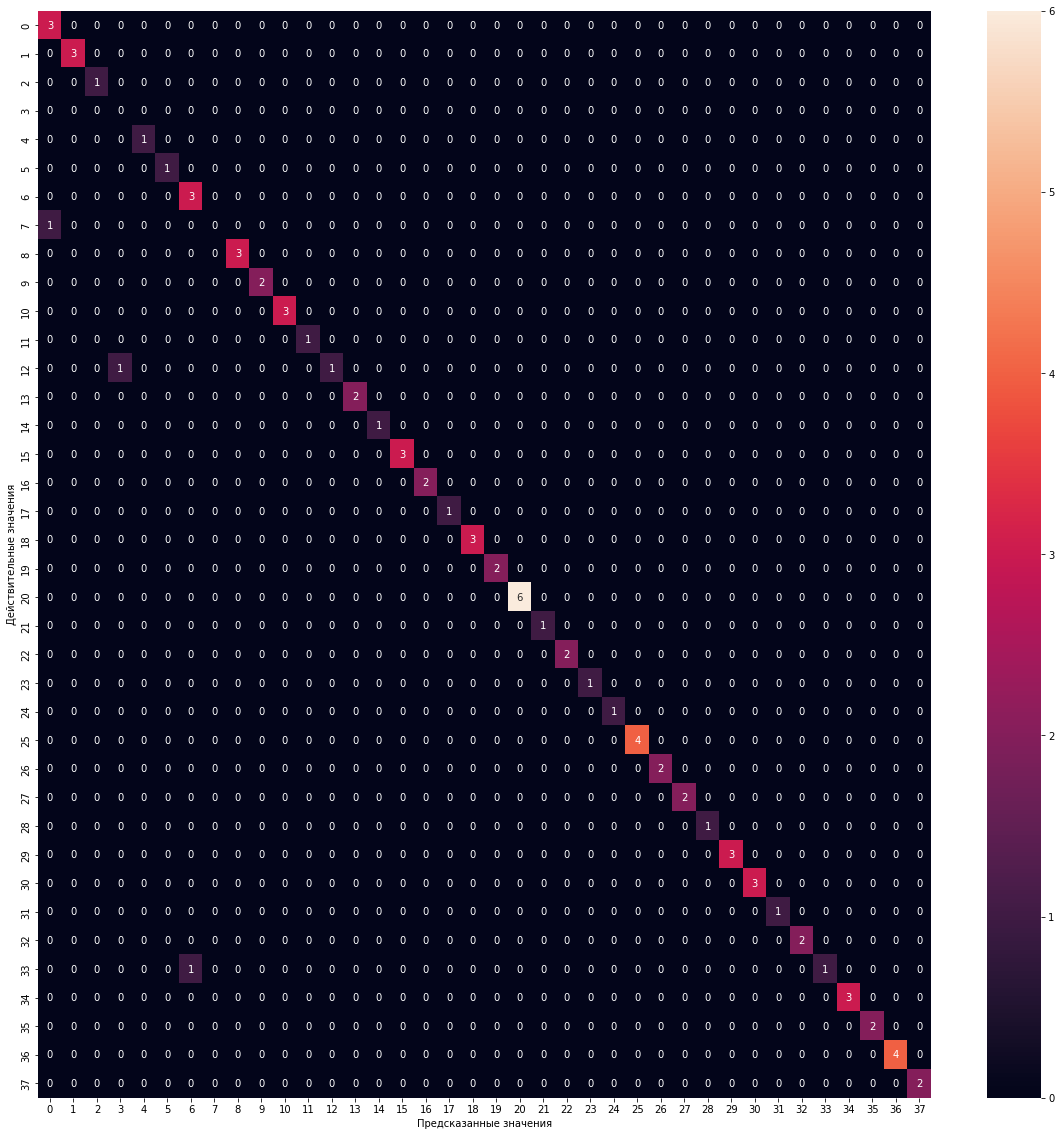

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(20,20))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
accur = metrics.accuracy_score(y_test, y_pred2)
dt_accur.append(accur)
dt_accur

[0.9625, 0.9625]

In [ ]:
precision = metrics.precision_score(y_test, y_pred2, average='macro')
dt_precis.append(precision)
dt_precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9342105263157895, 0.9144736842105263]

In [ ]:
dt = metrics.recall_score(y_test, y_pred2, average='macro')
collect_data.append(dt)
collect_data

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9210526315789473, 0.9078947368421053]

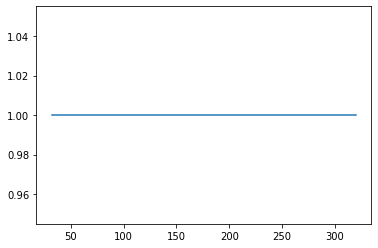

In [ ]:
#линейная
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

метод опорных векторов с гауссовым ядром (SVC);

In [ ]:
#гауссовое ядро по дефолту
from sklearn import svm
model_svc = svm.SVC()
model_svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred3 = model_svc.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred3)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Text(0.5, 159.0, 'Предсказанные значения')

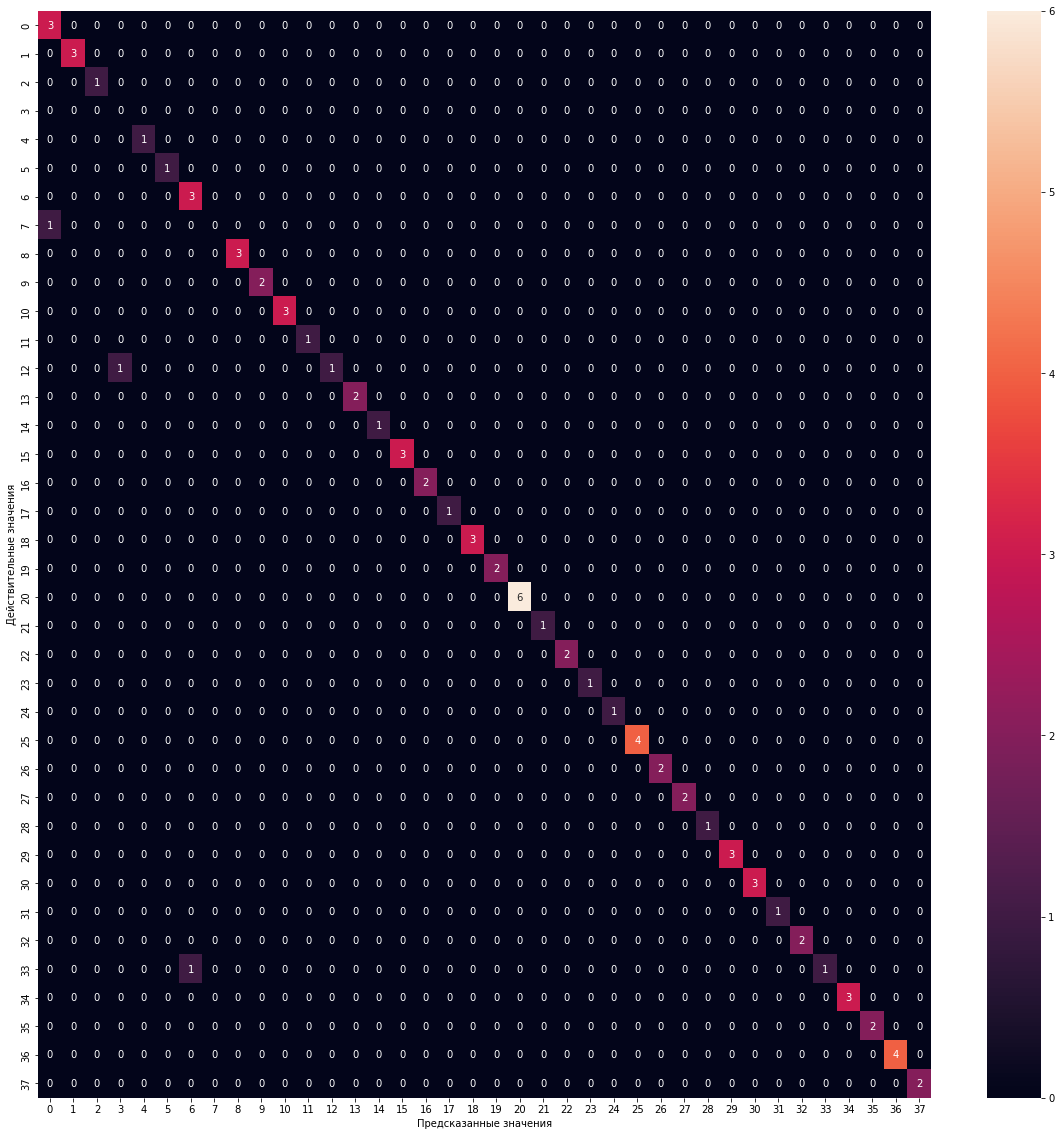

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(20,20))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
accur = metrics.accuracy_score(y_test, y_pred3)
dt_accur.append(accur)
dt_accur

[0.9625, 0.9625, 0.8375]

In [ ]:
precision = metrics.precision_score(y_test, y_pred3, average='macro')
dt_precis.append(precision)
dt_precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9342105263157895, 0.9144736842105263, 0.7974358974358974]

In [ ]:
dt = metrics.recall_score(y_test, y_pred3, average='macro')
collect_data.append(dt)
collect_data

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9210526315789473, 0.9078947368421053, 0.8183760683760684]

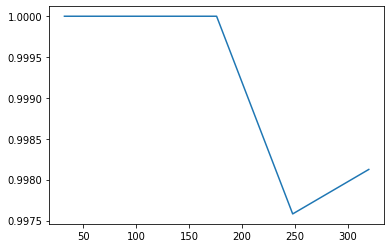

In [ ]:
#Гаусс
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='rbf'), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

метод опорных векторов с полиномиальным ядром (SVC);

In [ ]:
# ядро поли
from sklearn import svm
model_svc = svm.SVC(kernel="poly")
model_svc.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred4 = model_svc.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred3)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Text(0.5, 159.0, 'Предсказанные значения')

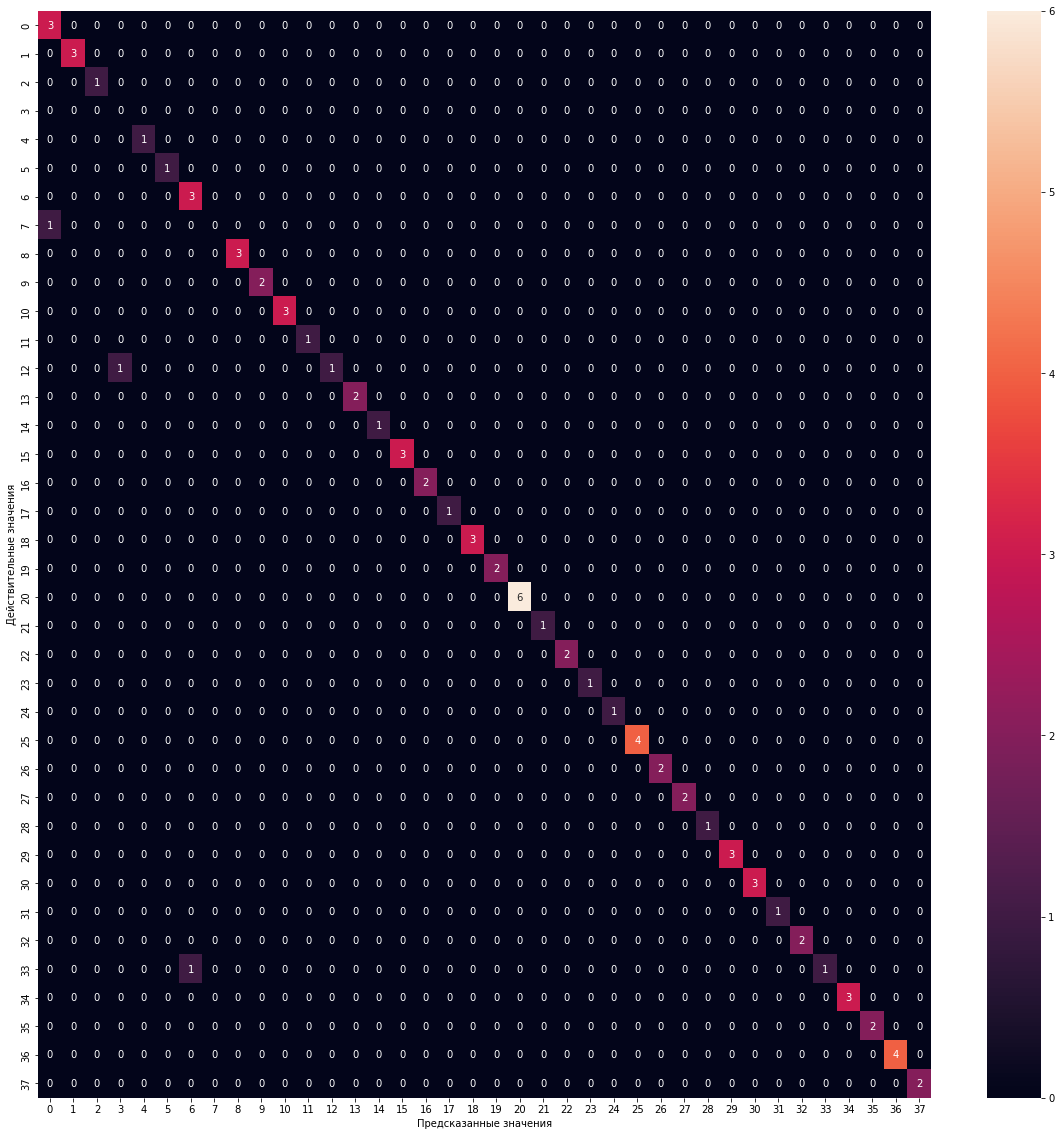

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(20,20))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
accur = metrics.accuracy_score(y_test, y_pred4)
dt_accur.append(accur)
dt_accur

[0.9625, 0.9625, 0.8375, 0.9375]

In [ ]:
precision = metrics.precision_score(y_test, y_pred4, average='macro')
dt_precis.append(precision)
dt_precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9342105263157895, 0.9144736842105263, 0.7974358974358974, 0.868859649122807]

In [ ]:
dt = metrics.recall_score(y_test, y_pred4, average='macro') 
collect_data.append(dt)
dt

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.881578947368421

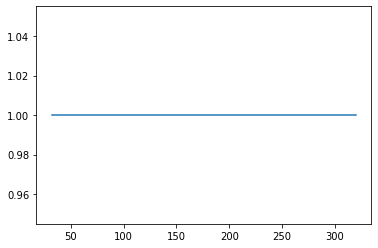

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='poly'), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

 метод k ближайших соседей (KNeighborsClassifier); 

In [ ]:
# k взяла = 5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred5 = classifier.predict(x_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred5)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [1, 0, 0, ..., 0, 0, 1]])

Text(0.5, 159.0, 'Предсказанные значения')

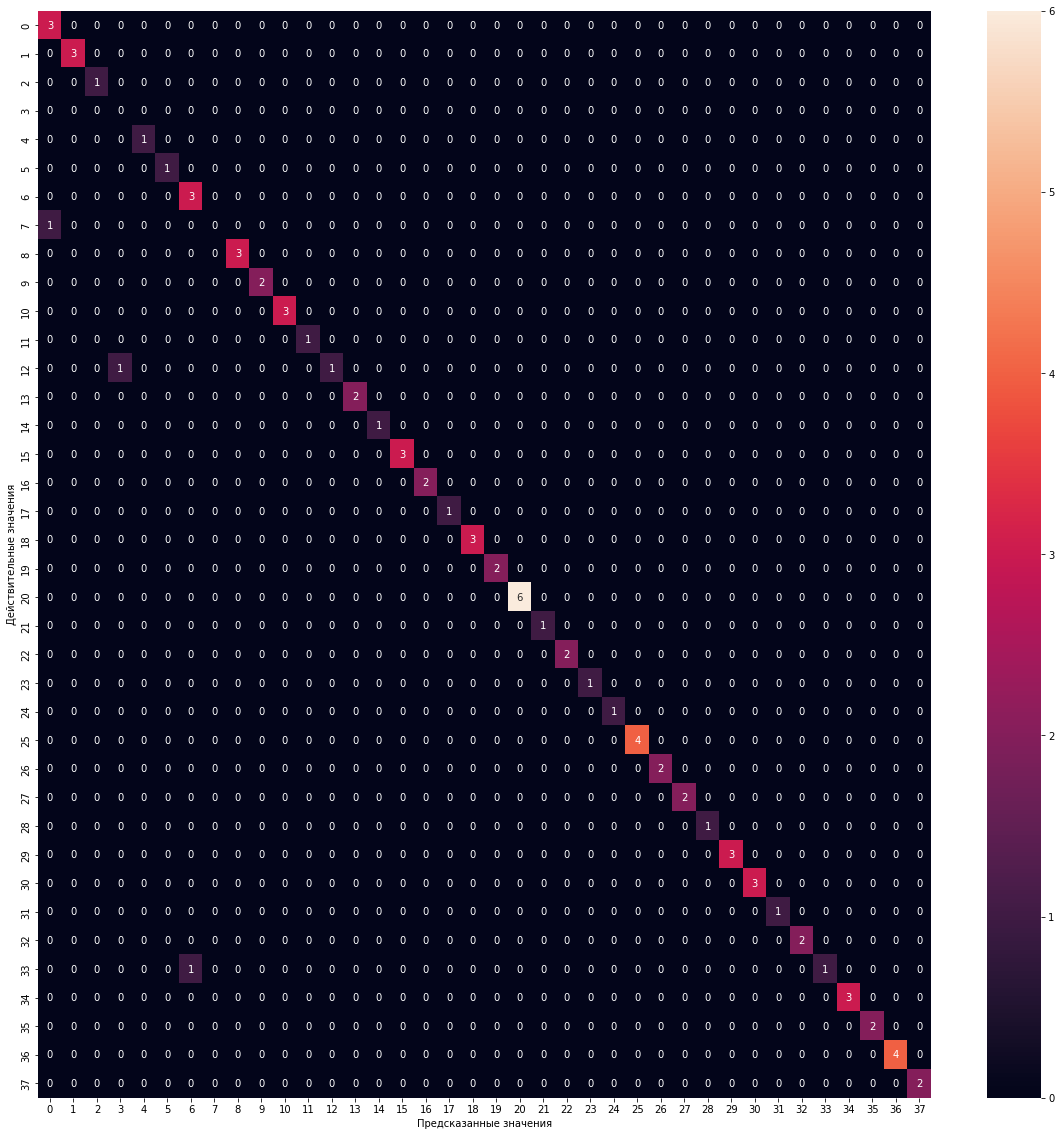

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(20,20))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
accur = metrics.accuracy_score(y_test, y_pred5)
dt_accur.append(accur)
dt_accur

[0.9625, 0.9625, 0.8375, 0.9375, 0.8125]

In [ ]:
precision = metrics.precision_score(y_test, y_pred5, average='macro')
dt_precis.append(precision)
dt_precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9342105263157895,
 0.9144736842105263,
 0.7974358974358974,
 0.868859649122807,
 0.8037240537240538]

In [ ]:
dt = metrics.recall_score(y_test, y_pred5, average='macro') 
collect_data.append(dt)
dt

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7863247863247863

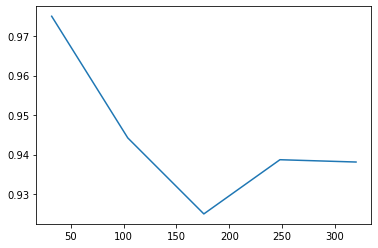

In [ ]:
#KNeighborsClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

f многослойный перцептрон (MLP)


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
y_pred6 = clf.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred6)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Text(0.5, 159.0, 'Предсказанные значения')

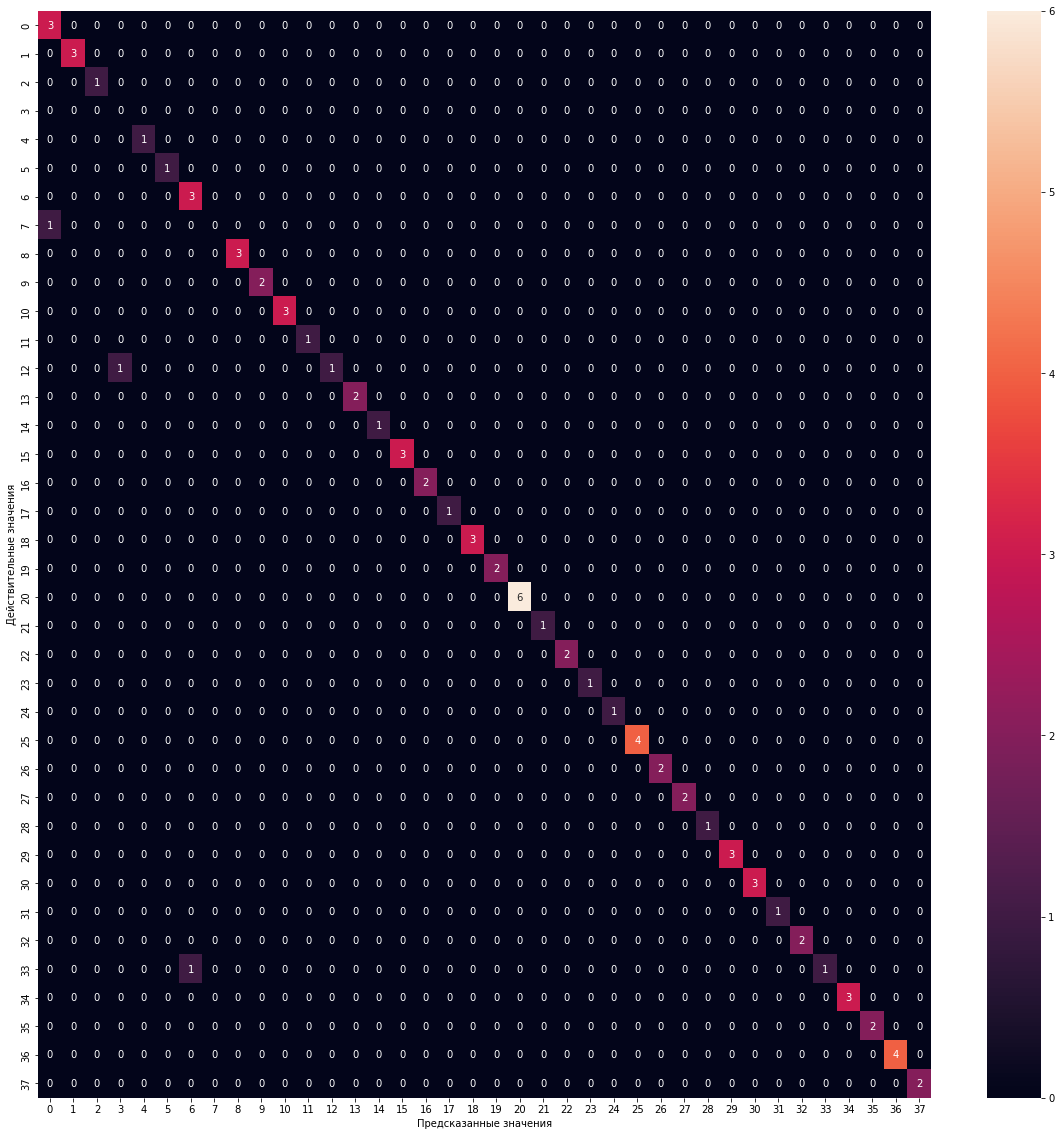

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(20,20))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
accur = metrics.accuracy_score(y_test, y_pred6)
dt_accur.append(accur)
dt_accur

[0.9625, 0.9625, 0.8375, 0.9375, 0.8125, 0.825]

In [ ]:
precision = metrics.precision_score(y_test, y_pred6, average='macro')
dt_precis.append(precision)
dt_precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9342105263157895,
 0.9144736842105263,
 0.7974358974358974,
 0.868859649122807,
 0.8037240537240538,
 0.7910256410256411]

In [ ]:
dt = metrics.recall_score(y_test, y_pred6, average='macro') 
collect_data.append(dt)
collect_data

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9210526315789473,
 0.9078947368421053,
 0.8183760683760684,
 0.881578947368421,
 0.7863247863247863,
 0.7991452991452991]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

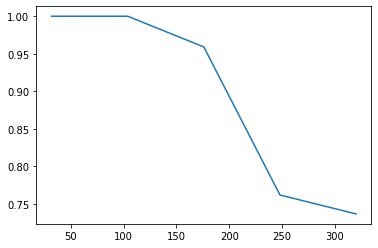

In [ ]:
#MLPClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

In [ ]:
# seaborn - строить обучаюие кривые 
#Лучшее значение равно 1, а худшее значение равно 0.
names = ['LogisticRegression','с опорным линейное ядро', 'с опорным гаусс', 'с опорным поли', 'KNeighborsClassifier', 'MLP']
det = dict(zip(names, collect_data)) 
data = pd.DataFrame(det, index = ['recall_score'])
data

,LogisticRegression,с опорным линейное ядро,с опорным гаусс,с опорным поли,KNeighborsClassifier,MLP
recall_score,0.921053,0.907895,0.818376,0.881579,0.786325,0.799145


In [ ]:
# достовеность предсказания 
print(dt_accur)
names =  ['LogisticRegression','с опорным линейное ядро', 'с опорным гаусс', 'с опорным поли', 'KNeighborsClassifier', 'MLP']
deta = dict(zip(names, dt_accur))
data = pd.DataFrame(deta, index = ['accuracity_score'])
data

[0.9625, 0.9625, 0.8375, 0.9375, 0.8125, 0.825]


,LogisticRegression,с опорным линейное ядро,с опорным гаусс,с опорным поли,KNeighborsClassifier,MLP
accuracity_score,0.9625,0.9625,0.8375,0.9375,0.8125,0.825


In [ ]:
# точность (precision)
print(dt_precis)
names =  ['LogisticRegression','с опорным линейное ядро', 'с опорным гаусс', 'с опорным поли', 'KNeighborsClassifier', 'MLP']
detaa = dict(zip(names, dt_precis))
data = pd.DataFrame(detaa, index = ['precision_score'])
data

[0.9342105263157895, 0.9144736842105263, 0.7974358974358974, 0.868859649122807, 0.8037240537240538, 0.7910256410256411]


,LogisticRegression,с опорным линейное ядро,с опорным гаусс,с опорным поли,KNeighborsClassifier,MLP
precision_score,0.934211,0.914474,0.797436,0.86886,0.803724,0.791026
